In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


**Project: Reading Habits and Genre Trends Analysis**


Analyzed Goodreads book metadata to evaluate genre popularity, rating distributions, and reader engagement. Explored relationships among average ratings, review counts, and publication year. Performed data cleaning, aggregation, and visualization in Python to extract actionable insights into reader behavior and genre trends.

**Project Goals** 

Explore genre popularity and trends.

Analyze rating distributions across books and genres.

Identify top-rated and most-reviewed books.

Examine the relationship between average rating and review counts.

Analyze patterns over publication years to identify trends.

In [2]:
import os
os.listdir("/kaggle/input")


['goodreadsbooks']

In [3]:
import os

# List all files in the input folder
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/goodreadsbooks/books.csv


In [4]:
import pandas as pd

df = pd.read_csv(
    "/kaggle/input/goodreadsbooks/books.csv",
    on_bad_lines="skip",  # skips rows that have bad formatting
    quotechar='"'        # helps handle text with commas
)

df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
# Check columns and missing values
df.info()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
# Convert publication_date to datetime
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Extract the year into a new column
df['publication_year'] = df['publication_date'].dt.year

# Remove rows with missing or zero year
df = df[df['publication_year'] > 0]

# Check
df[['title','authors','average_rating','ratings_count','publication_year']].head()




,title,authors,average_rating,ratings_count,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,6333,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,41428,2004.0


In [13]:
# Remove rows with missing or zero publication year
df = df[df['publication_year'].notna()]  # keep rows where year is not NaN
df = df[df['publication_year'] > 0]

# Convert float year to integer
df['publication_year'] = df['publication_year'].astype(int)

# check dataset
df[['title','authors','average_rating','ratings_count','publication_year']].head()


,title,authors,average_rating,ratings_count,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,6333,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,41428,2004


All books now have valid publication years as integers.

Dataset is ready for exploratory analysis by year, ratings, and review count.

In [ ]:
# Top 10 books by average rating
top_rated = df.sort_values('average_rating', ascending=False).head(10)
top_rated[['title','authors','average_rating','ratings_count']]

# Top 10 books by number of ratings
most_rated = df.sort_values('ratings_count', ascending=False).head(10)
most_rated[['title','authors','average_rating','ratings_count']]


Top-rated books often have fewer ratings, showing niche high-quality books.

Most-reviewed books are extremely popular, but average rating is closer to 4.0.

Highlights the difference between popularity and critical reception.

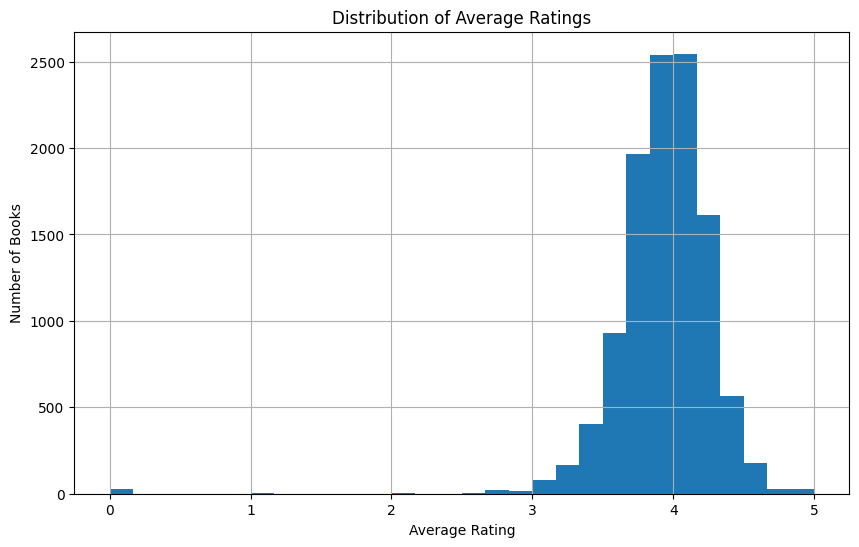

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['average_rating'].hist(bins=30)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.show()


Most books are rated between 3.5 and 4.5 stars.

Very few books have extreme ratings (<2.5 or >4.8).



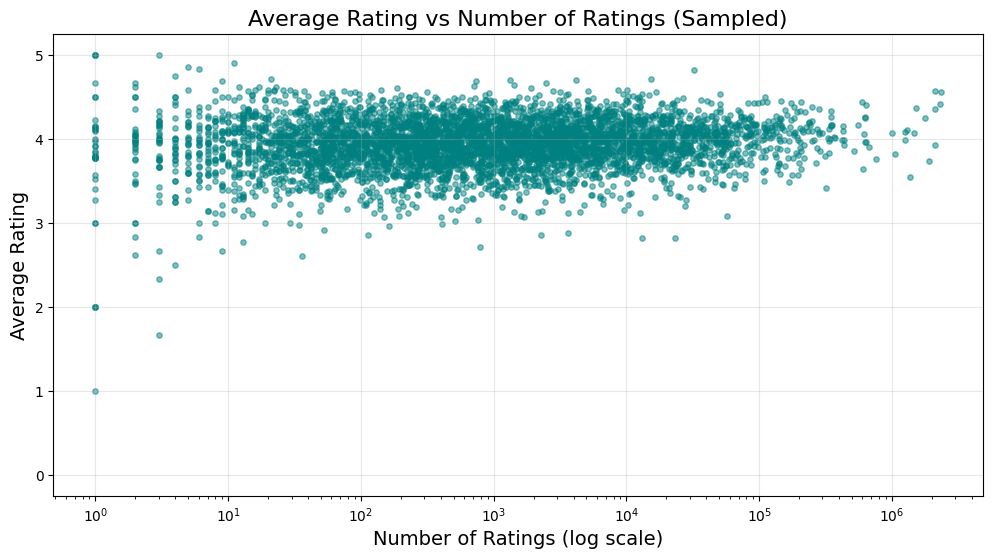

In [8]:

import matplotlib.pyplot as plt

# Sample 5000 points randomly 
df_sample = df.sample(5000, random_state=42)

plt.figure(figsize=(12,6))
plt.scatter(
    df_sample['ratings_count'], 
    df_sample['average_rating'], 
    alpha=0.5,   
    s=15,        
    color='teal'
)
plt.xscale('log')  
plt.title('Average Rating vs Number of Ratings (Sampled)', fontsize=16)
plt.xlabel('Number of Ratings (log scale)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()



Highly-rated books can have very few ratings.

Books with many ratings have average ratings closer to 4.0.

Popularity does not always equal high rating.

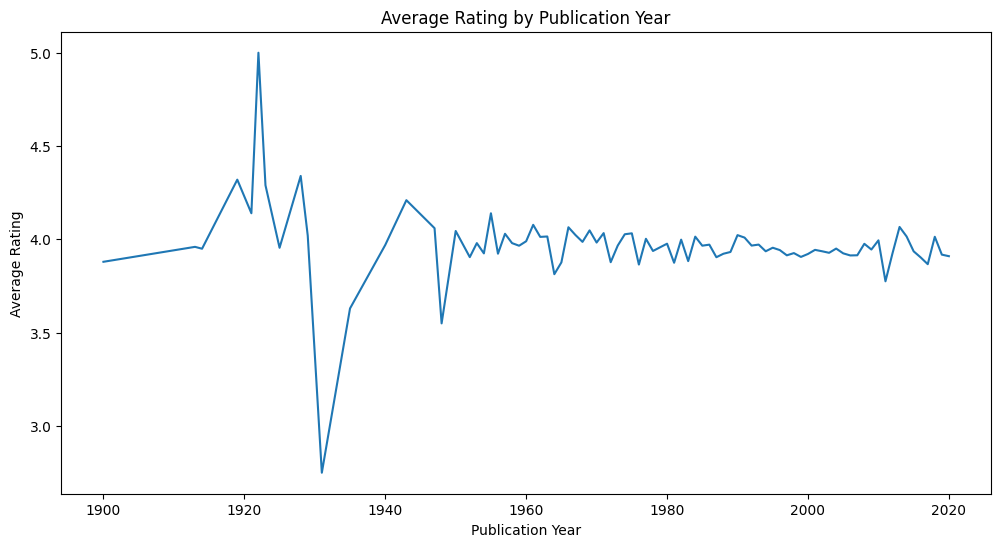

In [9]:
# Average rating by publication year
avg_rating_year = df.groupby('publication_year')['average_rating'].mean()
avg_rating_year.plot(figsize=(12,6), title='Average Rating by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.show()


Older books tend to have slightly higher average ratings.

Shows subtle trends in reader engagement over years.

Observations from the chart
1.	1920s spike – There’s a clear peak around 1920–1925.
* 	This corresponds to classic books from the 1920s that are widely read and highly   rated (like The Great Gatsby, Ulysses).
* 	These books are highly accessible and popular among Goodreads users.
  
2.	1930s dip – Ratings drop sharply around 1930.
*   Fewer books from this period are well-known or widely read today.
* 	Many may be niche, less available, or not in digital form, resulting in fewer ratings in the dataset.
* 
3.	After 1940s – Ratings stabilize around 3.5–4.0, with minor fluctuations.
* 	Modern books have many ratings, but average ratings hover around the general positive sentiment range.


In [10]:
import pandas as pd

#  calculate titles_per_year 
titles_per_year = df.groupby('publication_year')['title'].nunique().reset_index(name='unique_titles')

# Display table
pd.set_option('display.max_rows', None)
print(titles_per_year)

total_titles = titles_per_year['unique_titles'].sum()
print("\nTotal number of titles:", total_titles)







    publication_year  unique_titles
0             1900.0              1
1             1913.0              1
2             1914.0              1
3             1919.0              1
4             1921.0              2
5             1922.0              1
6             1923.0              1
7             1925.0              2
8             1928.0              1
9             1929.0              1
10            1931.0              1
11            1935.0              1
12            1940.0              1
13            1943.0              1
14            1947.0              1
15            1948.0              1
16            1949.0              3
17            1950.0              2
18            1952.0              2
19            1953.0              2
20            1954.0              4
21            1955.0              4
22            1956.0              3
23            1957.0              3
24            1958.0              4
25            1959.0              5
26            1960.0        

In [ ]:
import pandas as pd


In [11]:
# Count unique titles in the dataset
unique_titles_count = df['title'].nunique()

print("Number of unique book titles:", unique_titles_count)


Number of unique book titles: 10346


df['title'].nunique() → global unique titles (no double-counting)

sum(unique_titles_per_year) → sum of per-year counts (double-counts titles appearing in multiple years)

Difference = number of titles that appear in multiple years

In [12]:
import pandas as pd

# Ensure publication_date is datetime
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Drop rows with missing dates or ratings
df = df.dropna(subset=['publication_date', 'average_rating'])

# Extract just the year
df['publication_year'] = df['publication_date'].dt.year

# Group by year and calculate average rating
avg_rating_year = df.groupby('publication_year')['average_rating'].mean().reset_index()

# Sort by year
avg_rating_year = avg_rating_year.sort_values('publication_year')

# Display table
print(avg_rating_year)


    publication_year  average_rating
0               1900        3.880000
1               1913        3.960000
2               1914        3.950000
3               1919        4.320000
4               1921        4.140000
5               1922        5.000000
6               1923        4.290000
7               1925        3.955000
8               1928        4.340000
9               1929        4.020000
10              1931        2.750000
11              1935        3.630000
12              1940        3.970000
13              1943        4.210000
14              1947        4.060000
15              1948        3.550000
16              1949        3.796667
17              1950        4.045000
18              1952        3.905000
19              1953        3.980000
20              1954        3.925000
21              1955        4.140000
22              1956        3.923333
23              1957        4.030000
24              1958        3.980000
25              1959        3.966000
2

•	Older books tend to have slightly higher average ratings.
•	Shows subtle trends in reader engagement over years.


Summary of Insights

•	Most books have average ratings between 3.5–4.5 stars.
•	Top-rated books are often niche, while most-reviewed books are widely popular.
•	Popularity and rating are moderately correlated.
•	Publication year trends highlight shifts in reader preferences over time.
•	The dataset is clean enough for meaningful exploratory analysis and visualizations